# Instalación e importanción de librerías.

In [1]:
!pip install contractions
!pip install plotly
!pip install inflect
!pip install scikit-plot
 # librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\santi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#Esta installación es opcional. En Mac no me servia instalarlo de la forma de arriba
import sys
!{sys.executable} -m pip install contractions
!{sys.executable} -m pip install inflect
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install scikit-plot

In [3]:
# Instalación de librerias
import pandas as pd
import numpy as np
np.random.seed(3301)
import sys
from pandas_profiling import ProfileReport

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
import plotly.express as px
from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve,accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
import scikitplot.metrics as skplt
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import matplotlib.pyplot as plt
from itertools import dropwhile


from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from csv import reader,writer
import operator as op
import string
from sklearn import neighbors

# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

# 2 Perfilamiento y entendimiento de los datos

In [4]:
# Uso de la libreria pandas para la lectura de archivos
df=pd.read_csv('clinical_trials_on_cancer_data_clasificacion.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
df_t=df

In [5]:
df_t.head()

,label,study_and_condition
0,__label__0,study interventions are Saracatinib . recurren...
1,__label__1,study interventions are Stem cell transplantat...
2,__label__0,study interventions are Lenograstim . recurren...
3,__label__0,study interventions are Doxorubicin . stage ii...
4,__label__1,study interventions are Poly I-C . prostate ca...


In [6]:
textos = df_t.copy()
textos['Conteo'] = [len(x) for x in textos['study_and_condition']]
textos['Moda'] = [max(set(x.split(' ')), key = x.split(' ').count) for x in textos['study_and_condition']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['study_and_condition']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['study_and_condition']]
textos.head()


,label,study_and_condition,Conteo,Moda,Max,Min
0,__label__0,study interventions are Saracatinib . recurren...,250,study,15,1
1,__label__1,study interventions are Stem cell transplantat...,224,the,15,1
2,__label__0,study interventions are Lenograstim . recurren...,229,lymphoma,13,1
3,__label__0,study interventions are Doxorubicin . stage ii...,268,stage,13,1
4,__label__1,study interventions are Poly I-C . prostate ca...,232,and,15,1


# 3 Preparación y limpieza de los datos

In [15]:
def uselessdata(words):
    dot = words.index('.')
    new_words = words[dot+1:]
    return new_words

def nonascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def removestopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = uselessdata(words)
    words = lowercase(words)
    words = numbers(words)
    words = punctuation(words)
    words = nonascii(words)
    words = removestopwords(words)
    return words

In [16]:
df_t['study_and_condition'] = df_t['study_and_condition'].apply(contractions.fix) #Aplica la corrección de las contracciones 

In [17]:
df_t['words'] = df_t['study_and_condition'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
df_t.head()

,label,study_and_condition,words
0,0,study interventions are Saracatinib . recurren...,"[recurrent, verrucous, carcinoma, larynx, diag..."
1,1,study interventions are Stem cell transplantat...,"[hodgkin, lymphoma, diagnosis, history, congen..."
2,0,study interventions are Lenograstim . recurren...,"[recurrent, adult, diffuse, mixed, cell, lymph..."
3,0,study interventions are Doxorubicin . stage ii...,"[stage, iii, diffuse, large, cell, lymphoma, d..."
4,1,study interventions are Poly I-C . prostate ca...,"[prostate, cancer, diagnosis, unresolved, irae..."


In [18]:
def stemw(palabras):
    stemmer = LancasterStemmer()
    stems = []
    for palabra in palabras:
        stem = stemmer.stem(palabra)
        stems.append(stem)
    return stems

def lemmatizew(palabras):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for palabra in palabras:
        lemma = lemmatizer.lemmatize(palabra, pos='v')
        lemmas.append(lemma)
    return lemmas

def stemlemmatize(palabras):
    stems = stemw(palabras)
    lemmas = lemmatizew(palabras)
    return stems + lemmas

df_t['words'] = df_t['words'].apply(stemlemmatize) 
df_t.head()

,label,study_and_condition,words
0,0,study interventions are Saracatinib . recurren...,"[recur, verruc, carcinom, larynx, diagnos, pat..."
1,1,study interventions are Stem cell transplantat...,"[hodgkin, lymphom, diagnos, hist, congenit, he..."
2,0,study interventions are Lenograstim . recurren...,"[recur, adult, diffus, mix, cel, lymphom, diag..."
3,0,study interventions are Doxorubicin . stage ii...,"[stag, ii, diffus, larg, cel, lymphom, diagnos..."
4,1,study interventions are Poly I-C . prostate ca...,"[prost, cant, diagnos, unresolv, ira, follow, ..."


In [19]:
# Se arreglan datos puntuales
atributo = "label"
df_t[atributo].replace("__label__0", 0, inplace = True)
df_t[atributo].value_counts().to_frame()
df_t[atributo].replace("__label__1", 1, inplace = True)
df_t[atributo].value_counts().to_frame()

,label
0,6000
1,6000


In [20]:
#No se debe correr este para KNN
df_t['words'] = df_t['words'].apply(lambda x: ' '.join(map(str, x)))
df_t

,label,study_and_condition,words
0,0,study interventions are Saracatinib . recurren...,recur verruc carcinom larynx diagnos paty must...
1,1,study interventions are Stem cell transplantat...,hodgkin lymphom diagnos hist congenit hematolo...
2,0,study interventions are Lenograstim . recurren...,recur adult diffus mix cel lymphom diagnos cre...
3,0,study interventions are Doxorubicin . stage ii...,stag ii diffus larg cel lymphom diagnos stag i...
4,1,study interventions are Poly I-C . prostate ca...,prost cant diagnos unresolv ira follow pri bio...
...,...,...,...
11995,0,study interventions are Prednisolone hemisucci...,recur child larg cel lymphom diagnos known hyp...
11996,0,study interventions are Bevacizumab . recurren...,recur rect cant diagnos absolv neutrophil coun...
11997,1,"study interventions are Antibodies, Monoclonal...",recur lymphoblast lymphom diagnos intrathec in...
11998,0,study interventions are Vorinostat . colorecta...,colorect cant diagnos paty must receiv least o...


In [21]:
filename = 'processed_data.csv'
df_t.to_csv(filename)

# 4.Creación y aplicación del modelo

### 4.1 Regresión Logística


In [22]:
data_rl = df_t.copy()
X_train, X_test, y_train, y_test = train_test_split(data_rl['words'], data_rl['label'], test_size = 0.2, random_state= 99)
cv = CountVectorizer(token_pattern=r'\b\w+\b')
X_train =  cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [23]:
rl = LogisticRegression()
rl.fit(X_train,y_train)

C:\Users\santi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
predictions = rl.predict(X_test)

In [27]:
acc = accuracy_score(predictions, y_test)
print(f"Model Accuracy = {round(acc*100,2)}%")

Model Accuracy = 79.42%


In [28]:
new = np.asarray(y_test)
print('Confusion Matrix:\n\n', confusion_matrix(predictions,y_test))

Confusion Matrix:

 [[943 270]
 [224 963]]


In [29]:
print('Classification report:\n\n', classification_report(predictions,y_test))

Classification report:

               precision    recall  f1-score   support

           0       0.81      0.78      0.79      1213
           1       0.78      0.81      0.80      1187

    accuracy                           0.79      2400
   macro avg       0.79      0.79      0.79      2400
weighted avg       0.79      0.79      0.79      2400



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

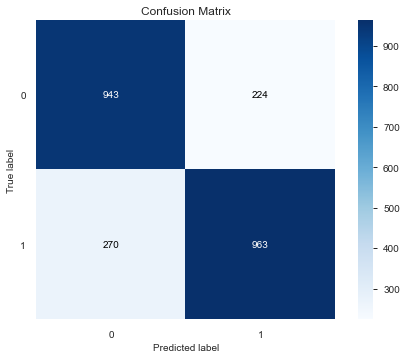

In [30]:
coso = skplt.plot_confusion_matrix(y_test,predictions)
coso

### 4.2 Naive Bayes

In [31]:
df_nb = df_t.copy()

In [32]:
def Text_Into_Vector(model,data):
    model_vect = model(ngram_range=(1,2)) #in scikit-learn
    final_array = model_vect.fit_transform(data.values)
    
    return model_vect, final_array

def Split_data(x_vec, y_vec):
    X_train, X_test, Y_train, Y_test = train_test_split(x_vec, y_vec, test_size=.33, random_state=0)
    xt, xc, yt, yc = train_test_split(X_train, Y_train, test_size=.33, random_state=0)
    return xt, xc, X_test, yt, Y_test, yc, X_train, Y_train

def Normalization(train, cv, test):
    train=preprocessing.normalize(train)
    cv=preprocessing.normalize(cv)
    test=preprocessing.normalize(test)
    
    return train, cv, test

In [33]:
def Multinomial_NB(X_train,xc,Y_train,yc):
    best_alpha=0
    max_roc_auc=-1
    pred_cv = []
    pred_train = []
    alpha=[10000,5000,1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]

    for i in alpha:
        mulbnb = MultinomialNB(alpha=i)
        mulbnb.fit(X_train,Y_train)
        probs = mulbnb.predict_proba(xc)[:,1]     
        prob = mulbnb.predict_proba(X_train)[:,1]

        auc_score_cv = roc_auc_score(yc,probs)
        auc_score_train = roc_auc_score(Y_train,prob)

        pred_cv.append(auc_score_cv)
        pred_train.append(auc_score_train)

        if(max_roc_auc<auc_score_cv):
            max_roc_auc=auc_score_cv
            best_alpha=i
    return best_alpha


In [34]:
def Testing_model(X_train,Y_train,X_test,Y_test,best_alpha):
    
    bnb = MultinomialNB(alpha = best_alpha, fit_prior=True, class_prior=None)
    bnb.fit(X_train,Y_train)
    probs = bnb.predict_proba(X_test)[:,1]

    roc_auc = roc_auc_score(Y_test,probs)

    prediction=bnb.predict(X_test)
    skplt.plot_confusion_matrix(Y_test,prediction)

    print("macro f1 score for data :",metrics.f1_score(Y_test, prediction, average = 'macro'))
    print("micro f1 score for data:",metrics.f1_score(Y_test, prediction, average = 'micro'))
    print("hamming loss for data:",metrics.hamming_loss(Y_test,prediction))
    print("\n")
    print("Precision recall report for data:\n",metrics.classification_report(Y_test, prediction))
    print("\n")
    
    return bnb,roc_auc

macro f1 score for data : 0.802752306743008
micro f1 score for data: 0.8027777777777778
hamming loss for data: 0.19722222222222222


Precision recall report for data:
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1995
           1       0.80      0.80      0.80      1965

    accuracy                           0.80      3960
   macro avg       0.80      0.80      0.80      3960
weighted avg       0.80      0.80      0.80      3960





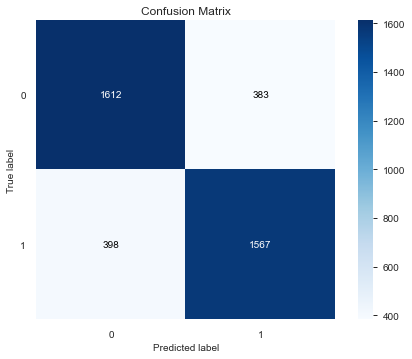

In [35]:
BOW, X = Text_Into_Vector(CountVectorizer,df_nb['words'])
xt, xc, X_test, yt, Y_test, yc, X_train, Y_train = Split_data(X, df_nb['label'])
best_alpha_bow = Multinomial_NB(xt,xc,yt,yc)
NB_bow, roc_auc_bow = Testing_model(xt,yt,X_test,Y_test,best_alpha_bow)

### 4.3 KNN

In [36]:
df_k = df_t.copy()
df_k.head()

,label,study_and_condition,words
0,0,study interventions are Saracatinib . recurren...,recur verruc carcinom larynx diagnos paty must...
1,1,study interventions are Stem cell transplantat...,hodgkin lymphom diagnos hist congenit hematolo...
2,0,study interventions are Lenograstim . recurren...,recur adult diffus mix cel lymphom diagnos cre...
3,0,study interventions are Doxorubicin . stage ii...,stag ii diffus larg cel lymphom diagnos stag i...
4,1,study interventions are Poly I-C . prostate ca...,prost cant diagnos unresolv ira follow pri bio...


#### **Eliminación del Ruido**
La eliminación del ruido se utiliza para dejar el archivo en texto plano. También para eliminar caracteres especiales y pasar todo a minúscula.

In [37]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words, stopwords=stopwords.words('english')):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def preproccesing(words):
    words = to_lowercase(words)
    #words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

#### **Tokenización**
La tokenización permite dividir frases u oraciones en palabras. Con el fin de desglozar las palabras correctamente para el posterior análisis. Pero primero, se realiza una corrección de las contracciones que pueden estar presentes en los textos. 

In [38]:
new_X_train= df_k['study_and_condition'] .apply(contractions.fix) #Aplica la corrección de las contracciones
new_X_train = new_X_train.apply(word_tokenize)
new_X_train = new_X_train.apply(preproccesing) #Aplica la eliminación del ruido
new_X_train.head()

0    [study, interventions, saracatinib, recurrent,...
1    [study, interventions, stem, cell, transplanta...
2    [study, interventions, lenograstim, recurrent,...
3    [study, interventions, doxorubicin, stage, iii...
4    [study, interventions, poly, ic, prostate, can...
Name: study_and_condition, dtype: object

#### **Normalización**
Para la normalización de los datos se realiza una eliminación de prefijos y sufijos, además de realizar una lemmatización de los verbos.

In [39]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    words = stem_words(words)
    words = lemmatize_verbs(words)
    return words

new_X_train = new_X_train.apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
new_X_train.head()

0    [study, interv, saracatinib, recur, verruc, ca...
1    [study, interv, stem, cel, transpl, hodgkin, l...
2    [study, interv, lenograstim, recur, adult, dif...
3    [study, interv, doxorubicin, stag, ii, diffus,...
4    [study, interv, poly, ic, prost, cant, diagnos...
Name: study_and_condition, dtype: object

#### **Transformación de campos**

In [40]:
df_k['words'] = new_X_train.apply(lambda x: ' '.join(map(str, x)))
df_k

,label,study_and_condition,words
0,0,study interventions are Saracatinib . recurren...,study interv saracatinib recur verruc carcinom...
1,1,study interventions are Stem cell transplantat...,study interv stem cel transpl hodgkin lymphom ...
2,0,study interventions are Lenograstim . recurren...,study interv lenograstim recur adult diffus mi...
3,0,study interventions are Doxorubicin . stage ii...,study interv doxorubicin stag ii diffus larg c...
4,1,study interventions are Poly I-C . prostate ca...,study interv poly ic prost cant diagnos unreso...
...,...,...,...
11995,0,study interventions are Prednisolone hemisucci...,study interv prednisolon hemisuccin recur chil...
11996,0,study interventions are Bevacizumab . recurren...,study interv bevacizumab recur rect cant diagn...
11997,1,"study interventions are Antibodies, Monoclonal...",study interv antibody monoclon recur lymphobla...
11998,0,study interventions are Vorinostat . colorecta...,study interv vorinost colorect cant diagnos pa...


Realizar la transformación Term-frecuency times inverse Document-frecuency.

In [41]:
tf_idf = TfidfVectorizer()
X_tf_idf = tf_idf.fit_transform(df_k['words'])
print(X_tf_idf.shape)

(12000, 6279)


In [42]:
response = tf_idf.fit_transform(df_k['words'])
classes = df_k['label']
feature_names = tf_idf.get_feature_names()

### **Modelado**

In [43]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(response, classes, test_size=0.2, random_state=0)

# Utilicemos un número de vecinos = 2 
modelo_knn = KNeighborsClassifier(n_neighbors=2)
modelo_knn = modelo_knn.fit(X_train, Y_train)

y_pred_train = modelo_knn.predict(X_train)
y_pred_test = modelo_knn.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.86
Exactitud sobre test: 0.72


              precision    recall  f1-score   support

           0       0.67      0.90      0.77      1228
           1       0.83      0.54      0.66      1172

    accuracy                           0.72      2400
   macro avg       0.75      0.72      0.71      2400
weighted avg       0.75      0.72      0.71      2400



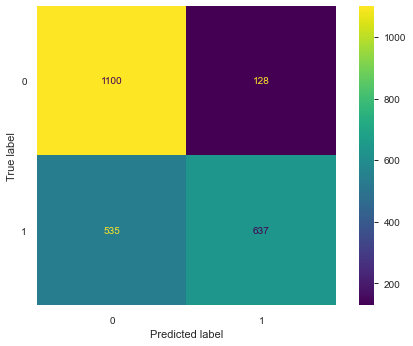

In [44]:
# Mostrar reporte de clasificación sobre test
print(classification_report(Y_test, y_pred_test))
# visualizar la matriz de confusión 
plot_confusion_matrix(modelo_knn, X_test, Y_test)  
plt.show()

#### Búsqueda con hiperparámetros

In [45]:
# Primero definamos el espacio de búsqueda
n_vecinos =  list(range(1,11))
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

param_grid = {'n_neighbors': n_vecinos, 'p': [1, 2]} #1 Manhattan, 2 euclidiana

In [ ]:
%%time
clasificadorKNN = KNeighborsClassifier()
modelo_Knn = GridSearchCV(clasificadorKNN, param_grid, cv=particiones)
modelo_Knn.fit(X_train,Y_train) 
print("Mejor parámetro: {}".format(modelo_Knn.best_params_)) 
print("Mejor cross-validation score: {:.2f}".format(modelo_Knn.best_score_))

In [ ]:
# Obtener el mejor modelo.
modelo_final = modelo_Knn.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = modelo_final.predict(X_train)
y_pred_test = modelo_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

In [ ]:
# Mostrar reporte de clasificación sobre test
print(classification_report(Y_test, y_pred_test))
# visualizar la matriz de confusión 
plot_confusion_matrix(modelo_Knn, X_test, Y_test)  
plt.show()

#### Normalizando

In [ ]:
#Normalizar los datos
norm=MaxAbsScaler()
X_train_n=norm.fit_transform(X_train)
X_test_n=norm.fit_transform(X_test)

In [ ]:
# Primero definamos el espacio de búsqueda
n_vecinos =  list(range(1,11))
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

param_grid = {'n_neighbors': n_vecinos, 'p': [1, 2]} #1 Manhattan, 2 euclidiana

In [ ]:
%%time
clasificadorKNN = KNeighborsClassifier()
modelo_Knn = GridSearchCV(clasificadorKNN, param_grid, cv=particiones)
modelo_Knn.fit(X_train_n,Y_train) 
print("Mejor parámetro: {}".format(modelo_Knn.best_params_)) 
print("Mejor cross-validation score: {:.2f}".format(modelo_Knn.best_score_))

In [ ]:
# Obtener el mejor modelo.
modelo_final = modelo_Knn.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = modelo_final.predict(X_train_n)
y_pred_test = modelo_final.predict(X_test_n)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

In [ ]:
# Mostrar reporte de clasificación sobre test
print(classification_report(Y_test, y_pred_test))
# visualizar la matriz de confusión 
plot_confusion_matrix(modelo_Knn, X_test_n, Y_test)  
plt.show()

In [ ]:
clf = neighbors.KNeighborsRegressor(n_neighbors=2)
clf.fit(response, classes)
clf.predict(response)